# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.
  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?
  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?
  12. Which model --- linear model or classification and regression tree --- has better performance on the test set?

In [ ]:
# Q1.1 Loading the car data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/cars_hw.csv - hw4')
df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


<Axes: xlabel='Price', ylabel='Make'>

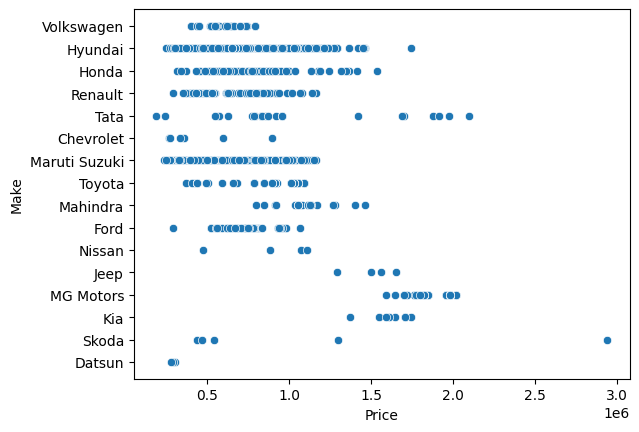

In [ ]:
# Q1.1 Seeing outliers
sns.scatterplot(data=df, y='Make', x='Price')
# there are some outliers like Skoda who are in the high price range

<Axes: xlabel='Price', ylabel='Mileage_Run'>

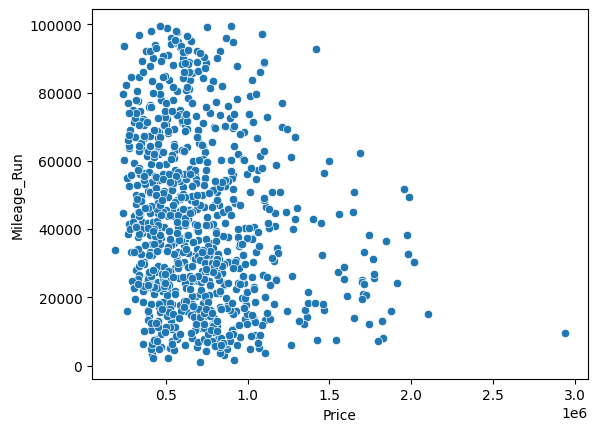

In [ ]:
# Q1.1 cont.
sns.scatterplot(data=df, y='Mileage_Run', x='Price')
# some outliers in the lower region of the mileage run and the 1.5 to 2.0 in the price range

<Axes: xlabel='mileage', ylabel='price'>

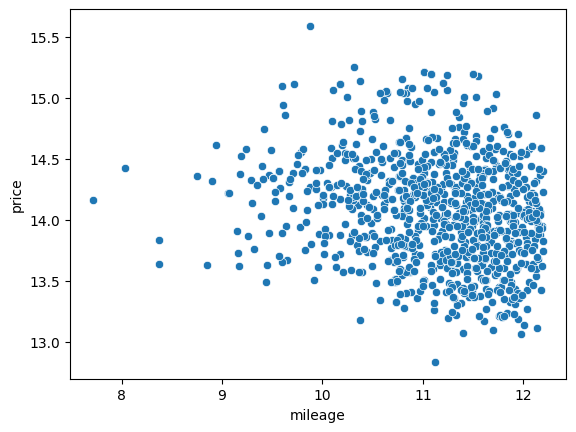

In [ ]:
# Q1.1 cont: Arcsinh transformation for the mileage and the price
df['price'] = np.arcsinh(df['Price'])
df['mileage'] = np.arcsinh(df['Mileage_Run'])
sns.scatterplot(data=df, y='price', x='mileage')

<Axes: >

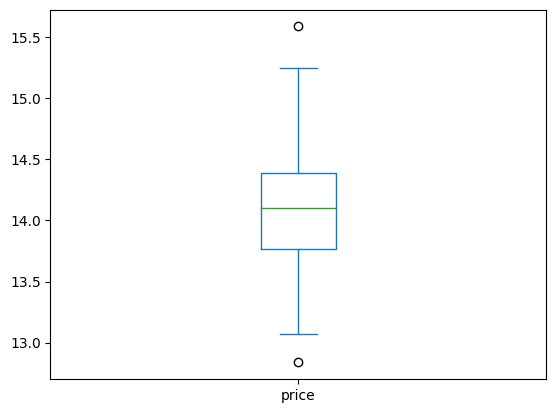

In [ ]:
# Q1.1 cont: outliers
df['price'].plot.box() # outliers are above 15.0 and below 13

<Axes: >

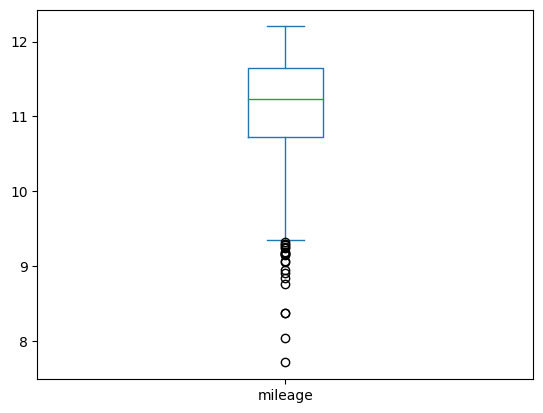

In [ ]:
# Q1.1 cont: more outliers
df['mileage'].plot.box() # outliers are below 9

In [ ]:
#  Q1.1 cont: dropping the outliers
df = df.loc[(df['price'] < 15) & (df['price'] > 13)]
df = df.loc[df['mileage']>9]

<Axes: xlabel='price', ylabel='mileage'>

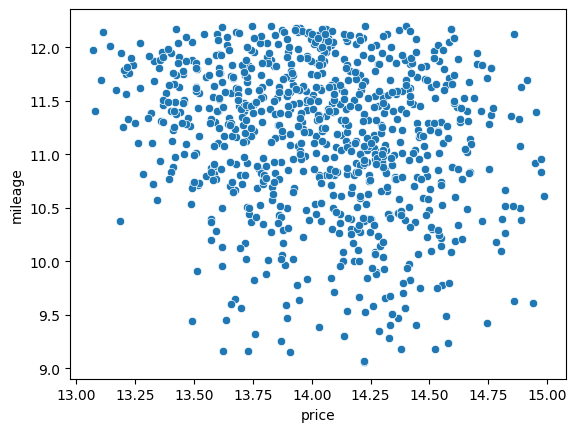

In [ ]:
sns.scatterplot(data=df, x='price', y='mileage')

In [ ]:
# Q1.2 Summarizing the price variable
df['Price'].describe()
# summarize prices by the brand
brand_price_summary = df.groupby('Make')['Price'].describe()
print(brand_price_summary)

               count          mean            std        min        25%  \
Make                                                                      
Chevrolet        6.0  4.535000e+05  246606.366503   267000.0   288500.0   
Datsun           3.0  2.896667e+05   10503.967504   279000.0   284500.0   
Ford            52.0  7.211731e+05  140927.699605   290000.0   635000.0   
Honda           73.0  7.989726e+05  266509.066586   316000.0   581000.0   
Hyundai        303.0  6.883663e+05  273461.635363   248000.0   484500.0   
Jeep             3.0  1.449667e+06  141387.175279  1290000.0  1395000.0   
Kia              4.0  1.529250e+06  109788.812423  1369000.0  1504000.0   
MG Motors        1.0  1.589000e+06            NaN  1589000.0  1589000.0   
Mahindra        18.0  1.100167e+06  175549.305961   796000.0  1037000.0   
Maruti Suzuki  290.0  5.902241e+05  216623.686518   237000.0   410250.0   
Nissan           3.0  8.103333e+05  304934.965744   475000.0   680000.0   
Renault         68.0  6.6

<ipython-input-11-68951474f9ca>:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=var, hue=group_by)


<Axes: xlabel='Price', ylabel='Density'>

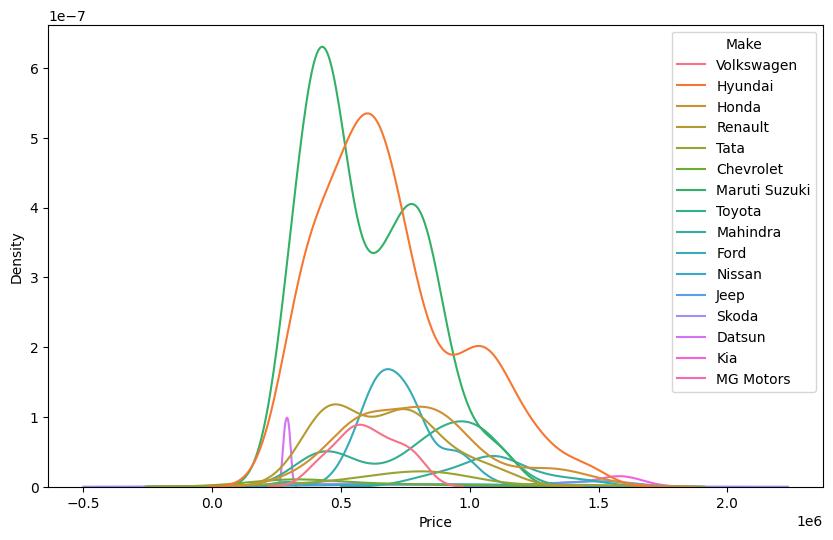

In [ ]:
# Q1.2 making the kernel density plot by Make

import seaborn as sns
import matplotlib.pyplot as plt

group_by = 'Make'
var = 'Price'

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=var, hue=group_by)

# The most expensive car brands are Datsun that are in the 40 and 50 thousands then Renault between the 20 and 30 thousands and the cheaper brands are Suzuki, Ford, and Hyundai.
# Then there is some variation with brands like Hyundai and Suzuki since they have multiple curves/ loops that are in the cheap section and then die down in the expensive section.
# Some brands with little variation would be Ford since it only has one curve /loop.

In [ ]:
# Q1.3 Splitting the data into an 80% training set and 20% testing set

vars = ['Make']
X = df.loc[:, vars]
y = df['Price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


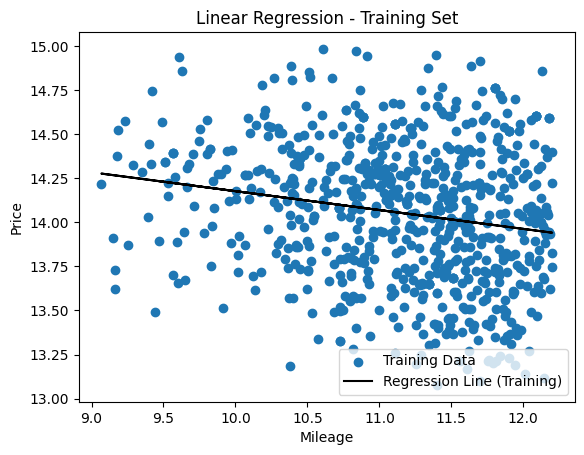

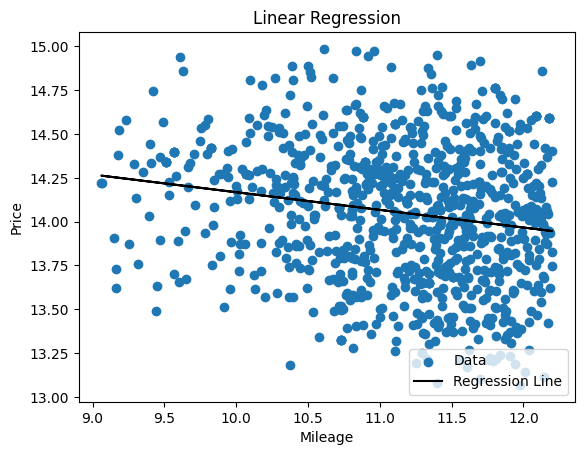

Intercept (b0): 15.173889754394928
Slope (b1): -0.10061137289932605


In [ ]:
# Q1.4 Linear Models: model to regress price on numeric variable alone

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

x = df['mileage'].values
y = df['price'].values

# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

def slr(x, y):
    x = x.flatten()  # flatten x to make it a 1d array
    y = y.flatten()  # flatten y to make it a 1d array so they are the same

    x_bar = np.mean(x)
    y_bar = np.mean(y)
    b1 = np.inner(x - x_bar, y - y_bar) / np.inner(x - x_bar, x)
    b0 = y_bar - b1 * x_bar
    y_hat = b0 + b1 * x
    residuals = y - y_hat
    return {'b0': b0, 'b1': b1, 'y_hat': y_hat, 'residuals': residuals}

# regression for training set
reg_train = slr(x_train, y_train)

plt.scatter(x_train, y_train, label='Training Data')
plt.plot(x_train, reg_train['y_hat'], color='black', label='Regression Line (Training)')
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.legend(loc='lower right')
plt.title('Linear Regression - Training Set')
plt.show()


plt.figure()

# regression for the entire dataset
reg = slr(x, y)

plt.scatter(x, y, label='Data')
plt.plot(x, reg['y_hat'], color='black', label='Regression Line')
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.legend(loc='lower right')
plt.title('Linear Regression')
plt.show()

print("Intercept (b0):", reg['b0'])
print("Slope (b1):", reg['b1'])


In [ ]:
# Calculating the R^2
import numpy as np

y_mean = np.mean(y) # calculate the mean of the actual values
ss_total = np.sum((y - y_mean)**2) # calculate the total sum of sqaures
ss_residual = np.sum((y - reg['y_hat'])**2) # calculate the sum of squared residuals
r2 = 1 - (ss_residual / ss_total) # calculate the r^2
print(r2)

# The r^2 is low meaning that there is not a lot of variation of the car price.

0.03209790824151504


In [ ]:
# Calculating the RMSE
import numpy as np

squared_diff = (y - reg['y_hat'])**2 # calculate the squared differences
mean_squared_diff = np.mean(squared_diff) # calculate the mean squared differences
rmse = np.sqrt(mean_squared_diff)

print(rmse)

# The RMSE is 0.38 which means that the predictions are moderarly accurate.

0.3871268411709615


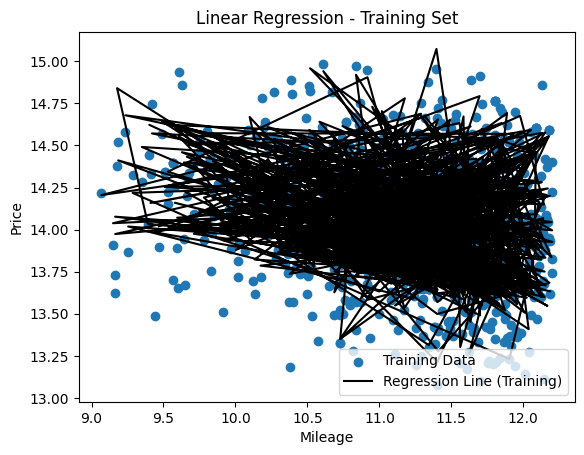

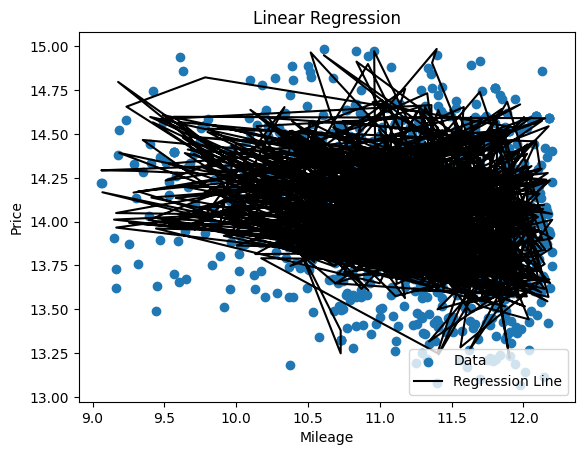

Intercept (b0) and Coefficients: [15.75910357 -0.17312533  0.07045248  0.26368394  0.10780352  0.20463857
  0.20508295  0.09507525  0.16178887  0.10510183  0.23279434 -0.36779248
  0.17837307  0.12176695  0.1814078   0.19463424 -0.23919438 -0.01795972
  0.1076332   0.28521869 -0.02070712  0.30920875  0.50826719  0.47482836
  0.64999435  0.96033639  1.02081338  0.5165437   0.35104832  0.29818216
  0.26819475  0.28079374  0.46898205  0.5796318   0.39114537 -0.26622885
 -0.03969528 -0.13082358]


In [ ]:
#Q1.4 cont: Second Linear model = categorical variables

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd


# numeric and categorical variables
numeric_cols = ['mileage']
categorical_cols = ['Color', 'Body_Type', 'Make', 'Fuel_Type', 'Transmission_Type']

# target variable
y = df['price'].values

# numeric variables
X_numeric = df[numeric_cols].values

# makes the categorical variable into binary: one hot encoded
X_categorical = pd.get_dummies(df[categorical_cols], drop_first=True).values

# combine numeric and one-hot encoded categorical variable
X = np.concatenate((X_numeric, X_categorical), axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

def linear_regression(X, y):

    X_with_intercept = np.c_[np.ones(X.shape[0]), X] # Add a column of ones for the intercept


    coefficients = np.linalg.lstsq(X_with_intercept, y, rcond=None)[0] # Calculate the parameters / coefficients of the model


    y_hat = X_with_intercept @ coefficients # calculate the predicted values

    return {'coefficients': coefficients, 'y_hat': y_hat} # return the coefficients and the predicted values

# Regression for training set
reg_train = linear_regression(X_train, y_train)

plt.scatter(X_train[:, 0], y_train, label='Training Data')
plt.plot(X_train[:, 0], reg_train['y_hat'], color='black', label='Regression Line (Training)')
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.legend(loc='lower right')
plt.title('Linear Regression - Training Set')
plt.show()

# Regression for the entire dataset
reg = linear_regression(X, y)

plt.scatter(X[:, 0], y, label='Data')
plt.plot(X[:, 0], reg['y_hat'], color='black', label='Regression Line')
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.legend(loc='lower right')
plt.title('Linear Regression')
plt.show()

print("Intercept (b0) and Coefficients:", reg['coefficients'])

From the two graphs shown above, it looks like multicollinearity is happening ( all the straight black lines that are bundled together), this might mean that some of the independent varibles move together (Color, Body_Type, Make, Fuel_Type, and Transmission_Type).  

In [ ]:
# Calculate the R^2 (second model)
y_mean = np.mean(y)  # Calculate the mean of the actual values
ss_total = np.sum((y - y_mean)**2)  # Total sum of squares
ss_residual = np.sum((y - reg['y_hat'])**2)  # Residual sum of squares
r2 = 1 - (ss_residual / ss_total)  # Calculate R2
print(r2)

# The r^2 is pretty high meaning that the model explains a good amount of the variability of the car price.

0.6161963725191117


In [ ]:
# Calculate the RMSE (second model)
import numpy as np

squared_diff = (y - reg['y_hat'])**2 # calculate the squared differences
mean_squared_diff = np.mean(squared_diff) # calculate the mean squared differences
rmse = np.sqrt(mean_squared_diff)

print(rmse)

# The RMSE is pretty low meaning that the prediction values are closer to the actual values

0.2437766514444251


The second model appears to be the better model because it has a higher r2 score and a lower RMSE score

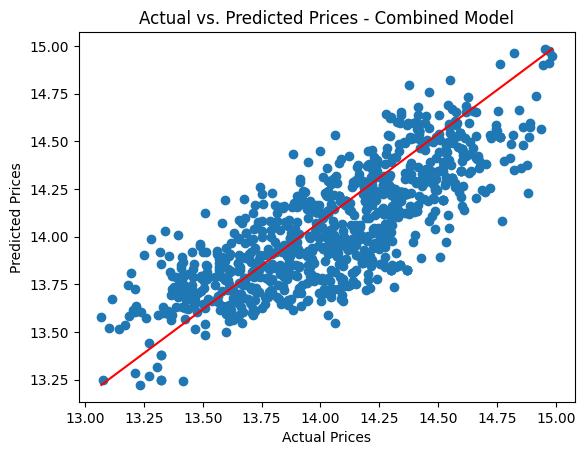

In [ ]:
#Q1.4 Third Linear model = combine all the regressions:

# x from the first model is a 1d array, change it to 2d array:
x = df['mileage'].values.reshape(-1, 1)

# Make the third model
combined_model = np.concatenate((x, X_categorical), axis=1)

# Find the predictor values:
regression_combined = linear_regression(combined_model, y)
# Getting the predicted prices
y_prediction_comb_model = regression_combined['y_hat']


# Graphing
plt.scatter(y, y_prediction_comb_model)
plt.plot([min(y), max(y)], [min(y_prediction_comb_model), max(y_prediction_comb_model)], color='red', label='Regression Line')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices - Combined Model")
plt.show()

In [ ]:
# Calculating the R^2

y_mean = np.mean(y)

# Calculate the sum of squared errors (SSE)
sse = np.sum((y - y_prediction_comb_model)**2)

# Calculate the sum of squared total (SST)
sst = np.sum((y - y_mean)**2)

# Calculate R^2
r2 = 1 - (sse / sst)

print(r2)
# The r^2 is pretty high meaning that the model explains a good amount of the variability of the car price.

0.6161963725191117


In [ ]:
# Calculating the RMSE
squared_diff_combined = (y - y_prediction_comb_model)**2
mean_squared_diff_combined = np.mean(squared_diff_combined)
rmse_combined = np.sqrt(mean_squared_diff_combined)

print(rmse_combined)
# The rmse is pretty low meaning that the model does a good job of

0.2437766514444251


The joint/ combined  model performs better than model 1 but also similarly with model 2.

Degree 1: R^2 = 0.0141, RMSE = 0.38
Degree 2: R^2 = 0.0142, RMSE = 0.38
Degree 3: R^2 = 0.0164, RMSE = 0.38
Degree 4: R^2 = 0.0072, RMSE = 0.38
Degree 5: R^2 = -0.0010, RMSE = 0.39


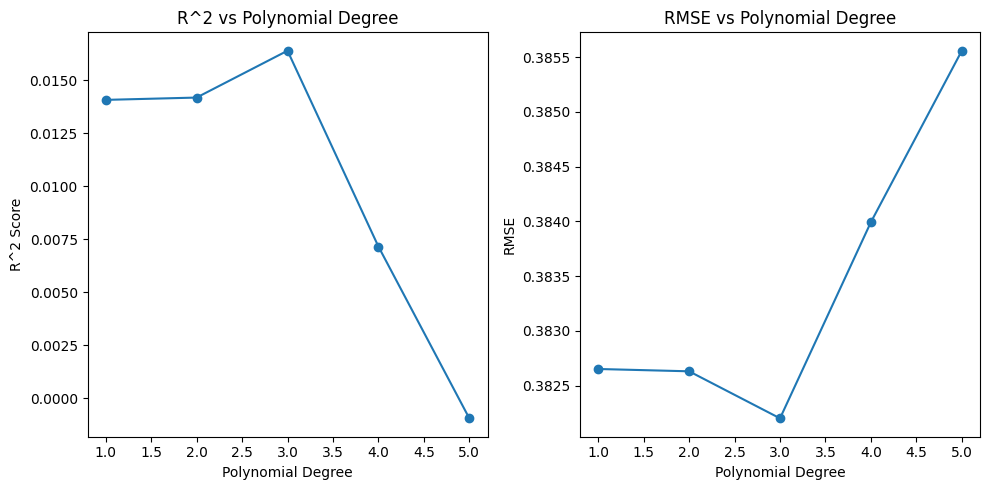

In [ ]:
# Q 1.5: Using the polynomial features in sklearn to expand both the categorical and numeric variables
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


# get the numerical and categorical variables
numerical_variables = df[['mileage']]
categorical_variables = df[['Color', 'Body_Type', 'Make', 'Fuel_Type', 'Transmission_Type']]

#mMakes the categorical variable into binary: one hot encoded
df_one_hot = pd.get_dummies(categorical_variables, drop_first=True)

# put together the numerical and the categorical / one hot encoded  variables
X_combined = pd.concat([numerical_variables, df_one_hot], axis=1)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, df['price'], test_size=0.2, random_state=100)

# define a range of polynomial degrees from 1 to 5
degrees = range(1, 6)

# lists to store results
r2_scores = [] # store the r^2 scores
rmse_scores = [] # store the rmse scores


for degree in degrees: # iterates over the different polynomial degrees ( 1-5)

    poly = PolynomialFeatures(degree=degree) # creates the polynomial features
    X_poly_train = poly.fit_transform(X_train[['mileage']])  # sets the mileage to the polynomial features
    X_poly_test = poly.transform(X_test[['mileage']]) # sets the mileage to the polynomial feaure, same set as above


    model_poly = LinearRegression()
    model_poly.fit(X_poly_train, y_train) # puts the linear regression model to the features of the training data set


    y_pred_poly = model_poly.predict(X_poly_test) # makes the prediction values


    r2_poly = r2_score(y_test, y_pred_poly) # calculates the r^2 between the actual and prediction values
    rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly)) # calculates the rmse between the actual and prediction values


    r2_scores.append(r2_poly) # puts the r^2 and rmse scores in the appropriate lists (were made in the beginning)
    rmse_scores.append(rmse_poly)


    print(f"Degree {degree}: R^2 = {r2_poly:.4f}, RMSE = {rmse_poly:.2f}") # prints the results for the r^2 and rmse polynomial features


plt.figure(figsize=(10, 5))

# Plot r^2 scores
plt.subplot(1, 2, 1)
plt.plot(degrees, r2_scores, marker='o')
plt.title('R^2 vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('R^2 Score')

# Plot RMSE scores
plt.subplot(1, 2, 2)
plt.plot(degrees, rmse_scores, marker='o')
plt.title('RMSE vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()


As you increase the degree of the expansion, the r^2 score decreases and then for the rmse it increases.
The r^2 goes negative with probably the 6th degree and more since at the 5th degree it is 0.
So the best r^2 and rmse would be for the first degree since r^2 is the highest value and the rmse is the lowest value.
This compares to the 2nd model since both have a high r^2 value but it is different from the rmse value since this one is pretty low but for the  second model it has a higher value than this one.  

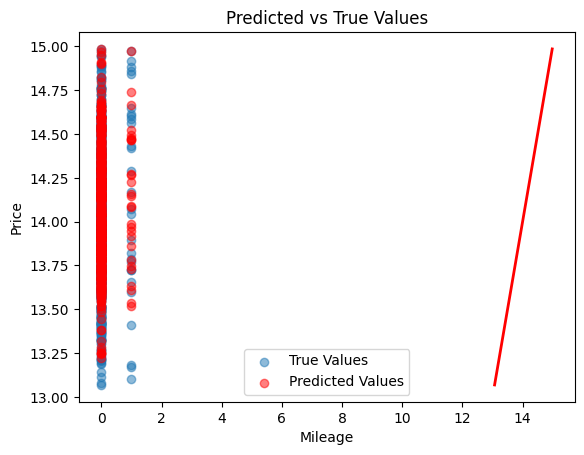

In [ ]:
# Q1.6: Determine the predicted values for the test data and plot them against the true values with model 2.

y_pred = reg['y_hat']

plt.scatter(X[:, 1], y, label='True Values', alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linewidth=2)
plt.scatter(X[:, 1], y_pred, label='Predicted Values', color='red', alpha=0.5)
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.legend()
plt.title('Predicted vs True Values')
plt.show()

# The predicted and actual values do not line up in a diagonal

In [ ]:
# Computing the residual/error for the test data

from sklearn.metrics import mean_squared_error
y_test_pred = np.c_[np.ones(X_test.shape[0]), X_test] @ reg['coefficients']  # Predicted values for the test data
residuals = y_test - y_test_pred # computing the residuals using sklearn
print("Residuals", residuals)



Residuals 291    0.534812
218   -0.146797
648    0.256842
474    0.114591
693   -0.215604
         ...   
709    0.075613
885   -0.078895
10     0.145744
909    0.112657
365    0.047125
Name: price, Length: 184, dtype: float64


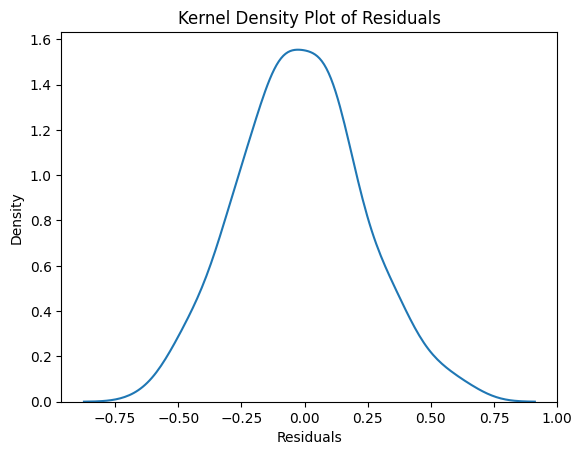

In [ ]:
# kernel density plot
import seaborn as sns

sns.kdeplot(residuals)
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Residuals")
plt.show()



- The residuals are balanced in a bell curve around zero since there are 3 positive residuals on the right  the zero and 3 negative residuals on the left side of the zero

Strengths:
-  residuals are small and centered aroung zero which means that the model has the variability of the data.
- there is symmetry in the bell curve meaning that most of the model's predictions are accurate

Weaknesses:
- there are both negative and positive residuals meaning that the problem might overpredict and / or underpredict
- there is a problem in accurately predicting certain instances, this is based on the magnitude of residuals. An example is the 623 and -0.21 which would unpredict the price for this point.


Error plotting tree with max_depth = 10: index 45 is out of bounds for axis 0 with size 44


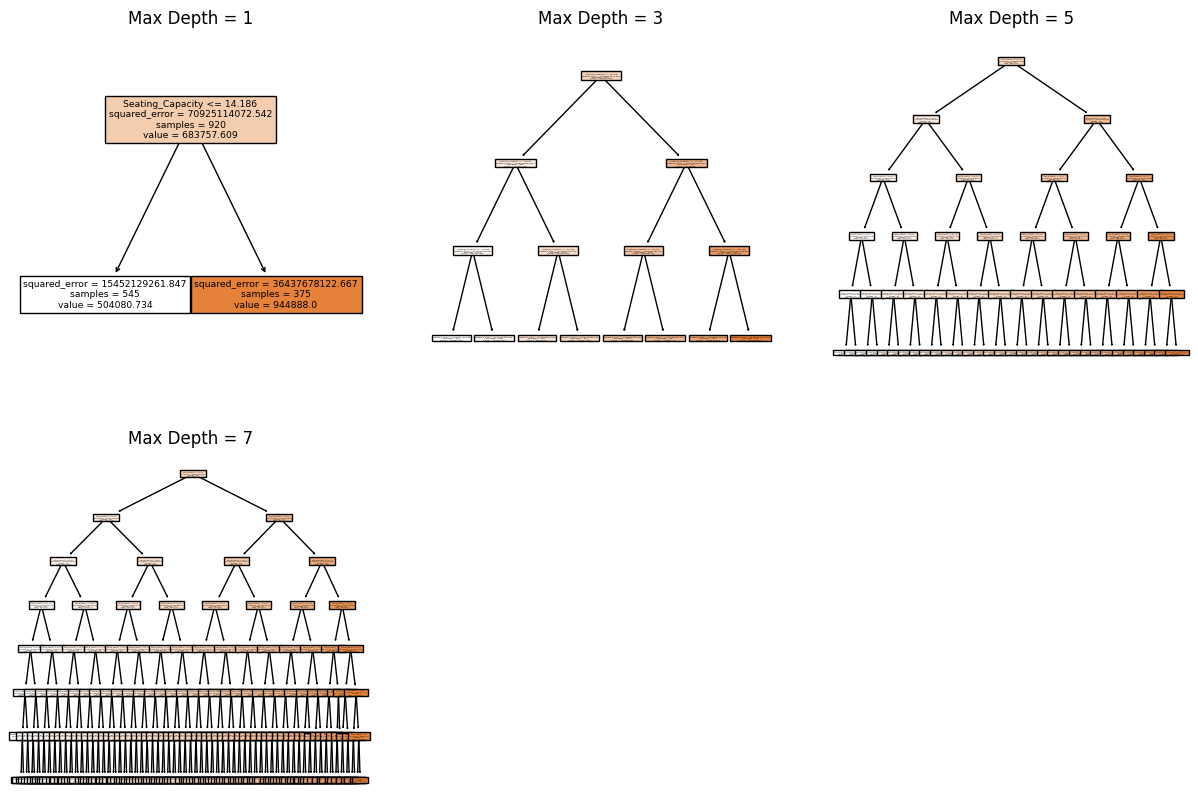

In [ ]:
# Q1.7: Regression tree: I used chat gpt since I was really lost on what to do. I understand that I had to convert the categorical to numeric and then play with the width. But the conversion part confused me.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder



df_encoded = pd.get_dummies(df, columns=['Make', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission_Type'], drop_first=True)

# convert the categorical variables and get the target variable ( price) - Prepares the data
X = df_encoded.drop(['Price'], axis=1)
y = df_encoded['Price']

# see the numeric and categorical columns - Prepares the data
numeric_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# create transformers for imputation based on data types - puts missing values into the numeric and categorical column and then converts categorical to numerical variables
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# create a preprocessor ( put transformations into the data)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])



# vary the maximum depth of the decision tree - assesses how the depth of the decision tree affects the model
max_depth_values = [1, 3, 5, 7, 10]

plt.figure(figsize=(15, 10))

for depth in max_depth_values:
    regression_tree = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', DecisionTreeRegressor(max_depth=depth))
    ])
    regression_tree.fit(X, y)


    try:
        plt.subplot(2, 3, max_depth_values.index(depth) + 1)
        plot_tree(regression_tree['regressor'], filled=True, feature_names=X.columns)
        plt.title(f'Max Depth = {depth}')
    except IndexError as e:
        print(f"Error plotting tree with max_depth = {depth}: {e}")

plt.show()


In [ ]:
# Q1.7 compute the r^2
from sklearn.metrics import r2_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Values used in the decision tree; it will go over them
max_depth_values = [1, 3, 5, 7, 10]

for max_depth in max_depth_values:  # iterates over the max depth value
    regression_tree = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', DecisionTreeRegressor(max_depth=max_depth)) # the tree deicsion regressor is made with the max depth
    ])
    regression_tree.fit(X_train, y_train)

    # Predictions
    y_pred = regression_tree.predict(X_test)

    # Calculate r^2
    r2 = r2_score(y_test, y_pred)
    print(f"R^2 for max_depth={max_depth}: {r2:.4f}")


R^2 for max_depth=1: 0.6407
R^2 for max_depth=3: 0.9738
R^2 for max_depth=5: 0.9982
R^2 for max_depth=7: 0.9998
R^2 for max_depth=10: 0.9998


In [ ]:
from sklearn.metrics import mean_squared_error
import math


rmse_scores = [] # where the rmse scores will be stored

for depth in max_depth_values:  # iterates over the max depth value
    regression_tree = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', DecisionTreeRegressor(max_depth=depth)) # the tree deicsion regressor is made with the max depth
    ])
    regression_tree.fit(X_train, y_train)

    # predictions
    y_pred = regression_tree.predict(X_test)

    # Calculate RMSE
    rmse = math.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append((depth, rmse))

    print(f"RMSE for max_depth={depth}: {rmse:.4f}")



RMSE for max_depth=1: 155969.8444
RMSE for max_depth=3: 42126.7482
RMSE for max_depth=5: 11008.5211
RMSE for max_depth=7: 4838.1447
RMSE for max_depth=10: 3053.0702


The best tree would be the one with the depth that is 10, this is becasue the r^2 is 0.9999 which is closest to 1  and the rmse score is 3053 which is the smallest out of all of them.

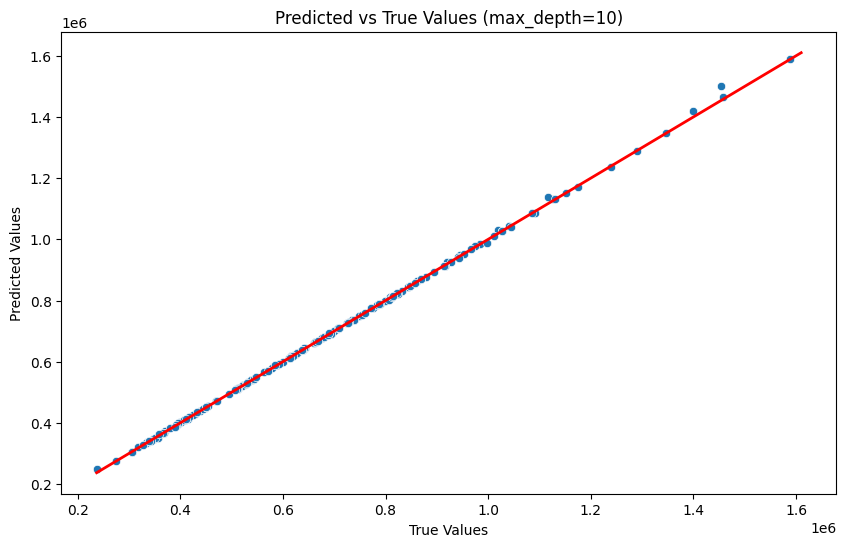

In [ ]:
# Q1.8: determine the predicted values for the test data, and plot them against the true values

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already trained the regression tree with max_depth=10
regression_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth=10))
])
regression_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regression_tree.predict(X_test)

# Plotting predicted values against true values
plt.figure(figsize=(10, 6))
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linewidth=2)
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs True Values (max_depth=10)")
plt.show()

# The predicted and actual values do line up with the diagonal line

In [ ]:
# Q1.8: computing the residual/ errors

residuals = y_test - y_pred

# Display the residuals or use them for further analysis)
print(residuals)


291    -6000.0
218        0.0
648   -13000.0
474        0.0
693    -2000.0
        ...   
709        0.0
885        0.0
10      2000.0
909    -1000.0
365        0.0
Name: Price, Length: 184, dtype: float64


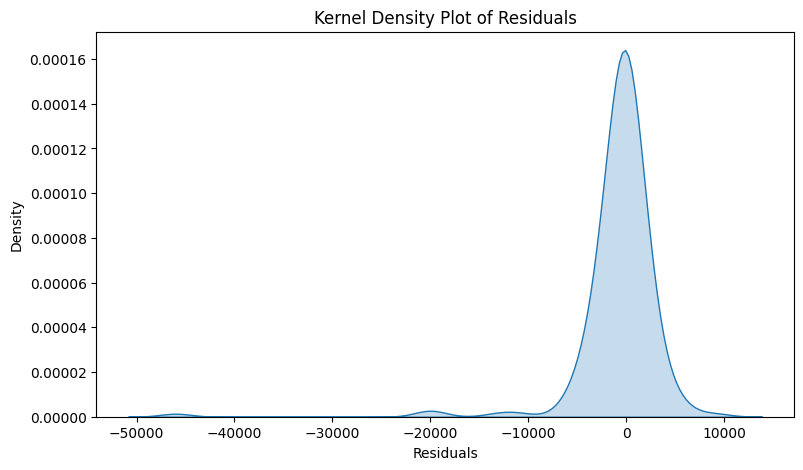

In [ ]:
# Kernel Density Plot

import seaborn as sns
import matplotlib.pyplot as plt

residuals = y_test - y_pred

# Create a kernel density plot
plt.figure(figsize=(9, 5))
sns.kdeplot(residuals, fill=True)
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Residuals")
plt.show()

# The residuals do not look roughly bell-shaped zero since there are way more negative resiudals on the left side after zero than the positive residuals.

Question 1.9: which is the better model

The better model would be the linear model since its bell shape has balanced residuals on both the positive and negative sides. This means that the model assumptions are met. It also has a low RMSE score (0.38) which means that it will have a good accuracy of prediction. The regression tree on the other hand, while it has an almost perfect r^2 score (close to one), it  doesn't have a regular or balanced bell curve around zero and it also has a high RMSE score which could be a sign of overfitting.

**Q2.** The is a question about regression using decision trees and linear models. The data include wages at data science-y jobs, including

  - `Rating`: Company worker happiness score
  - `Size`: Number of employees
  - `Sector`: Part of the economy
  - `avg_salary`: Average wage
  - `job_state`: Location of work

  1. Load the `wages_hw.csv` file. Split the sample into an ~80% training set and a ~20% test set. Do any necessary cleaning, including outliers and missings.
  2. Use a linear model to regress `avg_salary` on `Sector`. Which sectors have the highest predicted wages? What is the $R^2$ and `RMSE` on the test set?
  3. Make a scatterplot of `avg_salary` and `Rating`. Is there an obvious visual relationship between the two variables? Regress `avg_salary` on `Rating` as a numeric variable: Do higher ratings predict higher or lower wages? Convert `Rating` to a one-hot encoded variable, with a category for each rating. Run a regression of `avg_salary` on the categorical version. How do your results change? Explain. Which version has a higher $R^2$ and lower `RMSE`?
  4. Now interact `Sector` with the categorical version of `Rating`, so your regressors are a (Sector, Rating) pair; this is a programming puzzle you'll have to think about, but using the `.PolynomialFeatures()` function on the one-hot encoded categorical variables is one option, and another is pre-processing a new variable that interacts `Sector` and `Rating` and then one-hot encoding the result. Regress `avg_salary` on the (Sector, Rating) pairs. How does the $R^2$ and `RMSE` on the test set compare to part 2? Interpret the coefficients; which sector-rating pairs have the highest wages?
  5. Run a linear regression of `avg_salary` on all the variables. What is the $R^2$ on the test set? How does it compare to your simpler models in 2--4?
  6. Build a decision tree by regressing `avg_salary` on `Sector`, `Rating`, and the (Sector, Rating) pairs. What are the $R^2$ and `RMSE` of your models on the test set? How do your answers compare to parts 2, 3, and 4?
  7. Build a decision tree by regressing `avg_salary` on all the other variables. What is the $R^2$ and `RMSE` on the test set?
  8. Build a linear regression or decision tree using the available variables based on your own judgment. What degrees of freedom are you giving the model to predict variation in wages across company and location attributes? What is the $R^2$ and `RMSE` of your model? How does it compare to the previous ones in the question? Why does yours perform better or worse on the test set?

**Q3.** This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

    - Wife's age (numerical)
    - Wife's education (categorical) 1=low, 2, 3, 4=high
    - Husband's education (categorical) 1=low, 2, 3, 4=high
    - Number of children ever born (numerical)
    - Wife's religion (binary) 0=Non-Islam, 1=Islam
    - Wife's now working? (binary) 0=Yes, 1=No
    - Husband's occupation (categorical) 1, 2, 3, 4
    - Standard-of-living index (categorical) 1=low, 2, 3, 4=high
    - Media exposure (binary) 0=Good, 1=Not good
    - Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-termhort-term

  1. Load the `contraceptiveMethodChoice.csv` data. Tabulate the `method` variable (i.e. `.value_counts()`). 1 corresponds to `No Contraception`, 3 corresponds to `Short Term` (e.g. condoms, birth control pills), and 2 corresponds to `Long Term` (e.g. IUD, sterilization). Cross tabulate `method` and `numberChildren`. Do couples that use birth control tend to have more children than those who don't?
  2. Split the sample into ~80% training data and ~20% testing data.
  3. We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.
  4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?
  5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.
  7. Why can't you use a linear probability model to do this exercise? Explain clearly in words.

**Q4.** This is a question where we use regression and regression trees. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running these regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q5.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{eqnarray*}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{eqnarray*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{eqnarray*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{eqnarray*}

which can be written in terms of sample covariance and sample variance as:

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{eqnarray*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?

In [ ]:
# Q5.4: b* will be large or small depending on the relationship between x and y and the amount of noise in x.
# When b* is large, that means a strong linear relationship between x and y
# When b* is small then there will be a weak linear relationship between x and y or a significant / lots of noise in x.

#Q5.5: So if the measurement error increases the variance then the coefficient b* will decrease. The presense of of the measurement error weakens th erelationship of x and y which in return will decrease coefficient b*.
# This will lead to a bad regression line which means that the model will underestimale the relationship of x and y and also there will be higher uncertainty.

# Q5.6: if you increase a single value of the outcome yi or the predictor xi then the  slope might be pulled away from the trend and you will have outliers
# The model will then be skewed and the results might be incorrect.
# The model might not be representative of all the data.